##### Proyecto 1 teoria de la simulacion 
Josue Salomon Landa 20211001600 :3

![Hornet](https://ik.imagekit.io/diancrochet/Fotos/hornet-hollow.gif)

#### Importacion de librerias 

In [85]:
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import truncnorm

## 1. Selección de Dataset

##### https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

#### Leyendo el dataset

In [86]:
df = pd.read_csv('StudentsPerformance.csv')

In [87]:
df.head(5)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Cantidad de registros

In [89]:
df.shape[0]

1000

#### Explicacion de columnas


####
  gender → Género del estudiante (male o female).
####
 race → Grupo étnico al que pertenece el estudiante (group A, group B, etc.).
####
 parental_level_of_education → Nivel educativo más alto alcanzado por los padres (some college, bachelor's degree, etc.).
####
 lunch → Tipo de almuerzo que recibe el estudiante (standard o free/reduced).
####
 test_preparation_course → Si el estudiante completó un curso de preparación para los exámenes (none o completed).
####
 math_score → Puntuación obtenida en el examen de matemáticas (escala de 0 a 100).
####
 reading_score → Puntuación obtenida en el examen de lectura (escala de 0 a 100).
####
 writing_score → Puntuación obtenida en el examen de escritura (escala de 0 a 100).
####
 GPA → Promedio general del estudiante convertido a una escala de 4.0.

##### Analizando tipos de datos en las columnas

In [90]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

#### Generando una nueva columna GPA(Grade Point Average) a partir de las notas del df, para hacer un analisas mas completo

In [91]:
df["GPA"] = df[["math score", "reading score", "writing score"]].mean(axis=1) * (4 / 100)

In [92]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,female,group B,bachelor's degree,standard,none,72,72,74,2.906667
1,female,group C,some college,standard,completed,69,90,88,3.293333
2,female,group B,master's degree,standard,none,90,95,93,3.706667


In [93]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'GPA'],
      dtype='object')

##### Limpiando nombres de columnas

In [94]:
df.columns = ['gender', 'race', 'parental_level_of_education', 'lunch',
        'test_preparation_course', 'math_score', 'reading_score',
        'writing_score', 'GPA']

#### Columnas con su tipo de dato

In [95]:
df.dtypes

gender                          object
race                            object
parental_level_of_education     object
lunch                           object
test_preparation_course         object
math_score                       int64
reading_score                    int64
writing_score                    int64
GPA                            float64
dtype: object

#### columnas categoricas

In [96]:
cat_cols = []

for c in df.columns:
    if df[c].dtype == 'O':
        cat_cols.append(c)


In [97]:
cat_cols

['gender',
 'race',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

#### columnas numericas

In [98]:
num_cols = []

for c in df.columns:
    if df[c].dtype == 'int64' or df[c].dtype == 'float64': 
        num_cols.append(c)


In [99]:
num_cols

['math_score', 'reading_score', 'writing_score', 'GPA']

##### Revisando el dataset para determinar si esta bien simulado

In [161]:
# -------------------------------
# 🔵🔵🔵 ESTADÍSTICAS DEL DATASET COMPLETO 🔵🔵🔵
# -------------------------------
print("🔵🔵🔵 ESTADÍSTICAS DEL DATASET COMPLETO 🔵🔵🔵")
print(df['math_score'].describe())


# -------------------------------
# 🟢🟢🟢 ANÁLISIS POR 'gender' 🟢🟢🟢
# -------------------------------
# Cortes basados en la columna 'gender' (Categorías: 'female' y 'male')
print("\n🟢🟢🟢 ANÁLISIS POR 'gender' 🟢🟢🟢")
print("\nCorte para la categoría 'female' en 'gender'")
print("🔴🔴🔴 ESTADÍSTICAS PARA 'female' EN 'gender' 🔴🔴🔴")
print(df[df['gender'] == 'female']['math_score'].describe())



print("\nCorte para la categoría 'male' en 'gender'")
print("🔴🔴🔴 ESTADÍSTICAS PARA 'male' EN 'gender' 🔴🔴🔴")
print(df[df['gender'] == 'male']['math_score'].describe())



# -------------------------------
# 🟢🟢🟢 ANÁLISIS POR 'test_preparation_course' 🟢🟢🟢
# -------------------------------
# Cortes basados en la columna 'test_preparation_course' (Categorías: 'completed' y 'none')
print("\n🟢🟢🟢 ANÁLISIS POR 'test_preparation_course' 🟢🟢🟢")
print("\nCorte para la categoría 'none' en 'test_preparation_course'")
print("🔴🔴🔴 ESTADÍSTICAS PARA 'none' EN 'test_preparation_course' 🔴🔴🔴")
print(df[df['test_preparation_course'] == 'none']['math_score'].describe())



print("\nCorte para la categoría 'completed' en 'test_preparation_course'")
print("🔴🔴🔴 ESTADÍSTICAS PARA 'completed' EN 'test_preparation_course' 🔴🔴🔴")
print(df[df['test_preparation_course'] == 'completed']['math_score'].describe())


🔵🔵🔵 ESTADÍSTICAS DEL DATASET COMPLETO 🔵🔵🔵
count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64

🟢🟢🟢 ANÁLISIS POR 'gender' 🟢🟢🟢

Corte para la categoría 'female' en 'gender'
🔴🔴🔴 ESTADÍSTICAS PARA 'female' EN 'gender' 🔴🔴🔴
count    518.000000
mean      63.633205
std       15.491453
min        0.000000
25%       54.000000
50%       65.000000
75%       74.000000
max      100.000000
Name: math_score, dtype: float64

Corte para la categoría 'male' en 'gender'
🔴🔴🔴 ESTADÍSTICAS PARA 'male' EN 'gender' 🔴🔴🔴
count    482.000000
mean      68.728216
std       14.356277
min       27.000000
25%       59.000000
50%       69.000000
75%       79.000000
max      100.000000
Name: math_score, dtype: float64

🟢🟢🟢 ANÁLISIS POR 'test_preparation_course' 🟢🟢🟢

Corte para la categoría 'none' en 'test_preparation_course'
🔴🔴🔴 ESTADÍSTICAS PARA 'none' EN 'test_preparation_course'

##### Viendo los cortes que se hicieron, podemos ver que es una dataset bueno para poder trabajar en el

## 2. Análisis Exploratorio de Datos (EDA)

##### Descripción del data set con las variables numericas

In [100]:
df.describe()

,math_score,reading_score,writing_score,GPA
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,2.710827
std,15.16308,14.600192,15.195657,0.570293
min,0.00000,17.000000,10.000000,0.360000
25%,57.00000,59.000000,57.750000,2.333333
50%,66.00000,70.000000,69.000000,2.733333
75%,77.00000,79.000000,79.000000,3.106667
max,100.00000,100.000000,100.000000,4.000000


#### Histograma de las variables numericas 

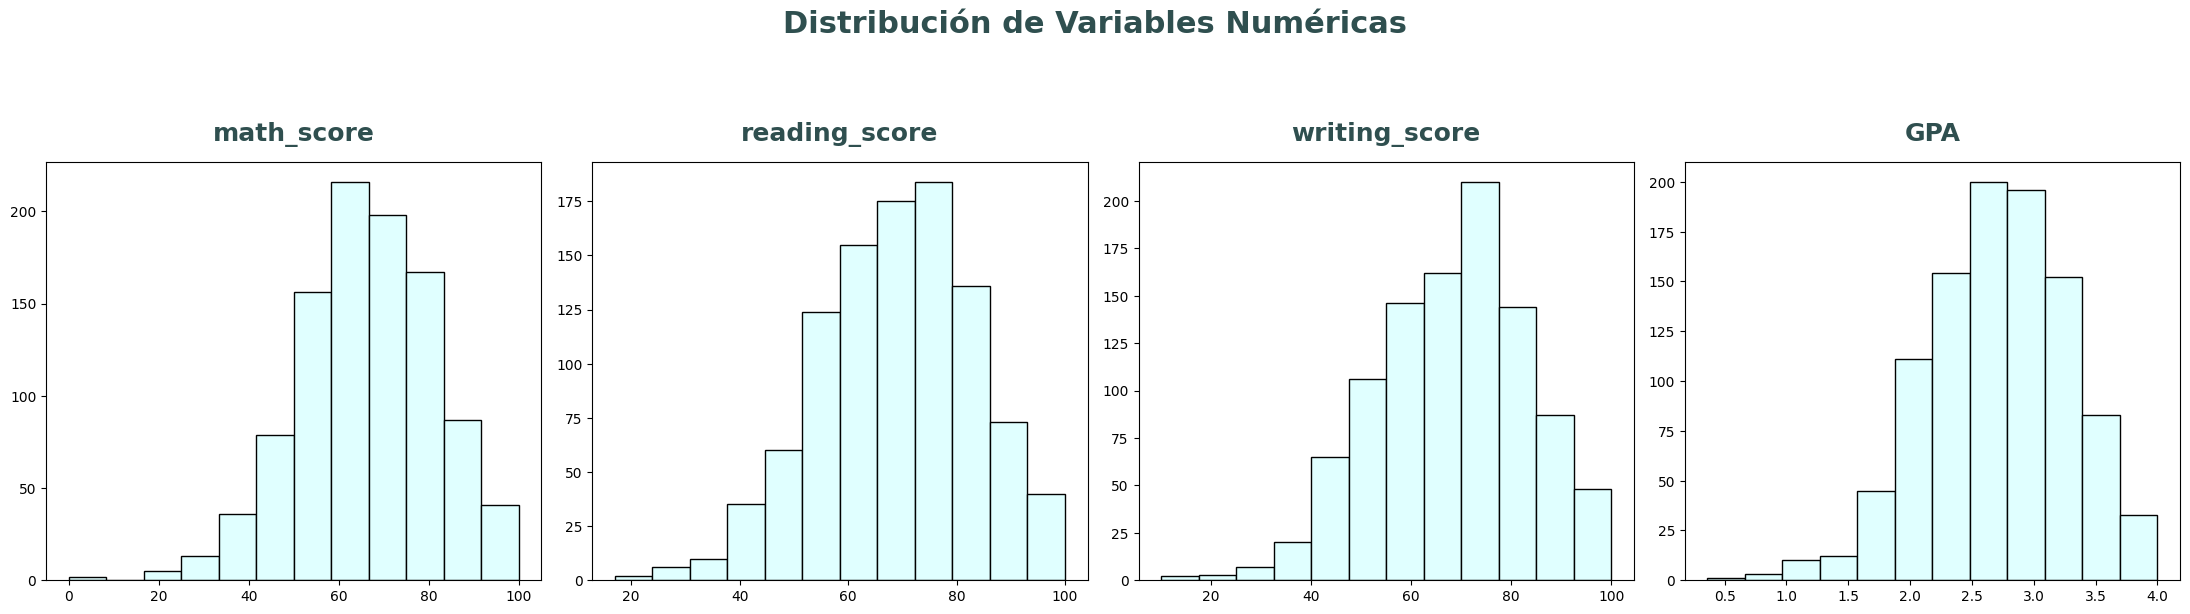

In [ ]:
axes = df[num_cols].hist(
    figsize=(22, 19), bins=12, edgecolor='black', layout=(4, 4), grid=False, color='lightcyan'
)

for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=18, y=1.03, fontweight='bold', color='darkslategray')  # Títulos en gris oscuro
    ax.set_xlabel(ax.get_xlabel(), fontsize=14, color='gray')  
    ax.set_ylabel(ax.get_ylabel(), fontsize=16, color='gray')  

plt.suptitle('Distribución de Variables Numéricas', fontsize=22, y=1.03, fontweight='bold', color='darkslategray')  # Título principal en gris oscuro

plt.tight_layout()
plt.show()


### Distribuciones de las categorías principales

In [102]:
distribuciones = df.groupby( cat_cols , as_index=False ).agg({
    "GPA": ["count"]
})

distribuciones.columns = cat_cols + ["count"]

In [103]:
distribuciones

,gender,race,parental_level_of_education,lunch,test_preparation_course,count
0,female,group A,associate's degree,free/reduced,none,3
1,female,group A,associate's degree,standard,completed,2
2,female,group A,associate's degree,standard,none,1
3,female,group A,bachelor's degree,standard,none,3
4,female,group A,high school,free/reduced,completed,3
...,...,...,...,...,...,...
206,male,group E,some college,standard,completed,4
207,male,group E,some college,standard,none,12
208,male,group E,some high school,free/reduced,completed,2
209,male,group E,some high school,standard,completed,6


#### Correlaciones entre variables

In [104]:
df[num_cols].corr()

,math_score,reading_score,writing_score,GPA
math_score,1.000000,0.817580,0.802642,0.918746
reading_score,0.817580,1.000000,0.954598,0.970331
writing_score,0.802642,0.954598,1.000000,0.965667
GPA,0.918746,0.970331,0.965667,1.000000


##### Correlaciones entre columnas categóricas vs numéricas

<Figure size 800x600 with 0 Axes>

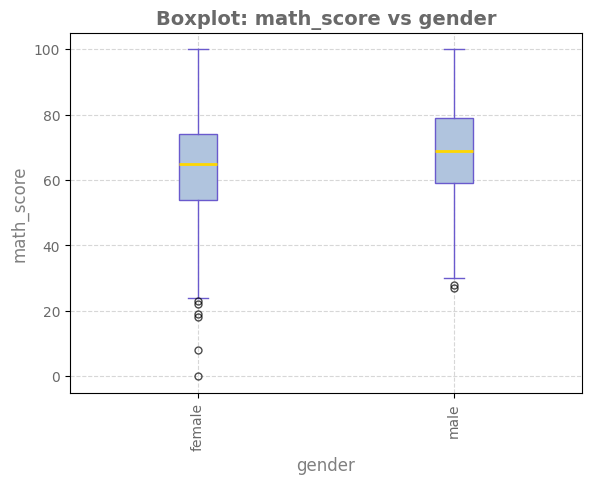

<Figure size 800x600 with 0 Axes>

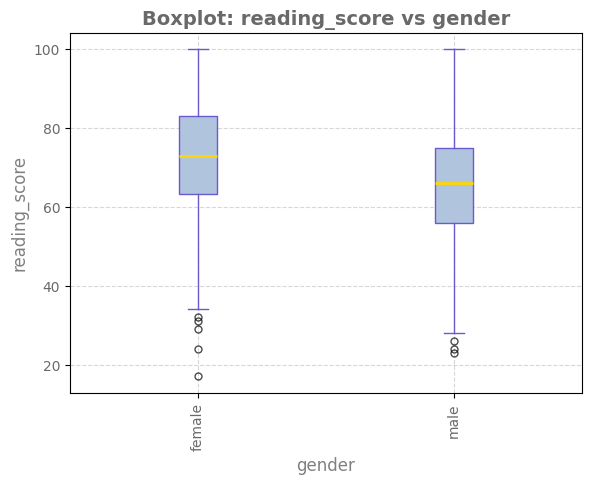

<Figure size 800x600 with 0 Axes>

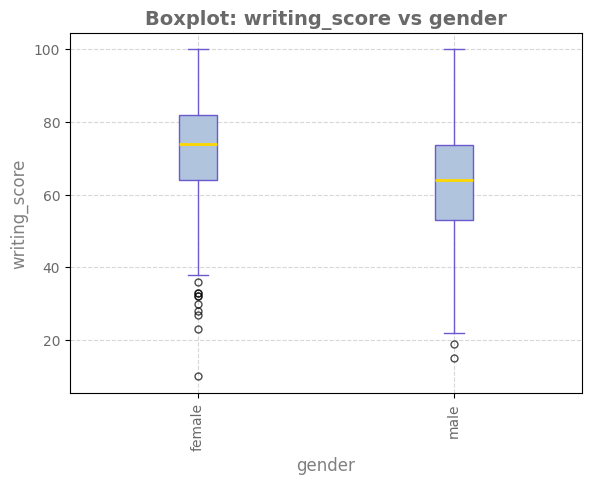

<Figure size 800x600 with 0 Axes>

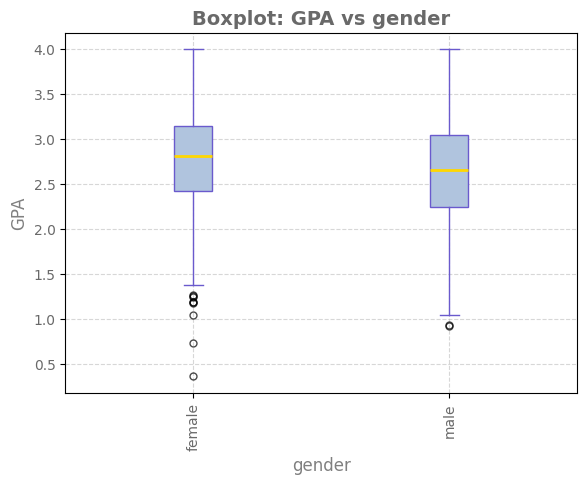

<Figure size 800x600 with 0 Axes>

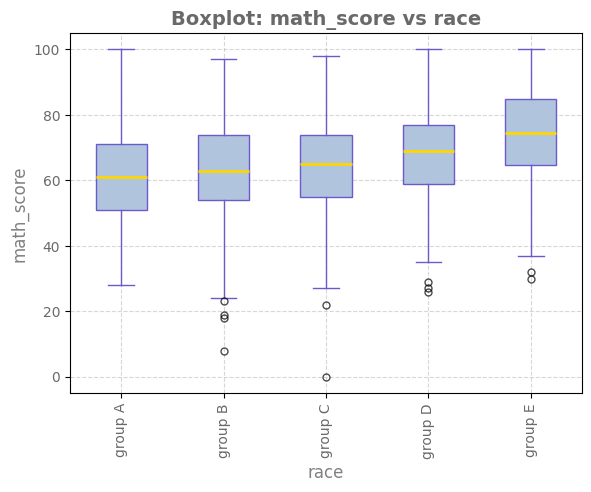

<Figure size 800x600 with 0 Axes>

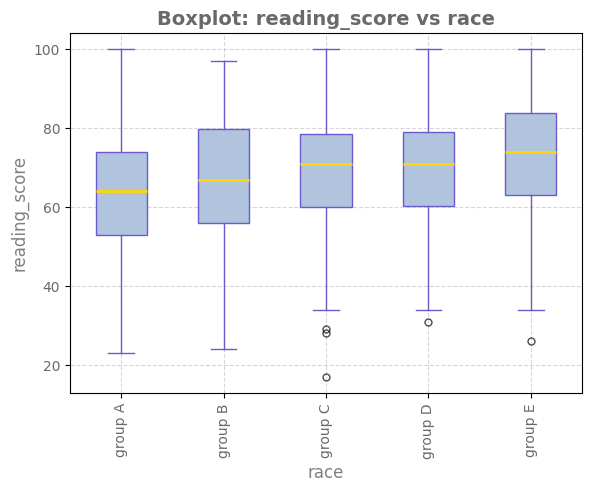

<Figure size 800x600 with 0 Axes>

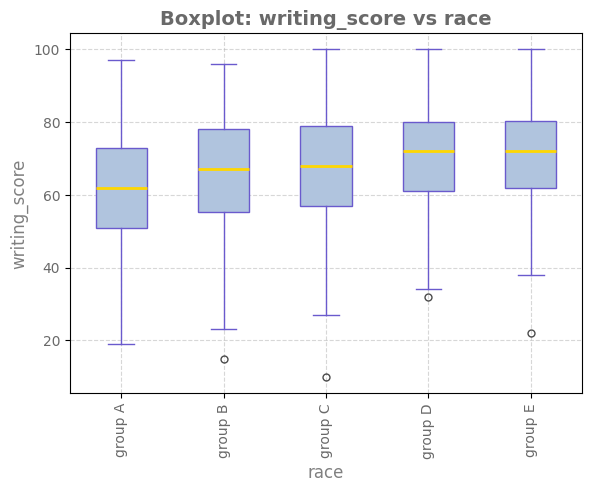

<Figure size 800x600 with 0 Axes>

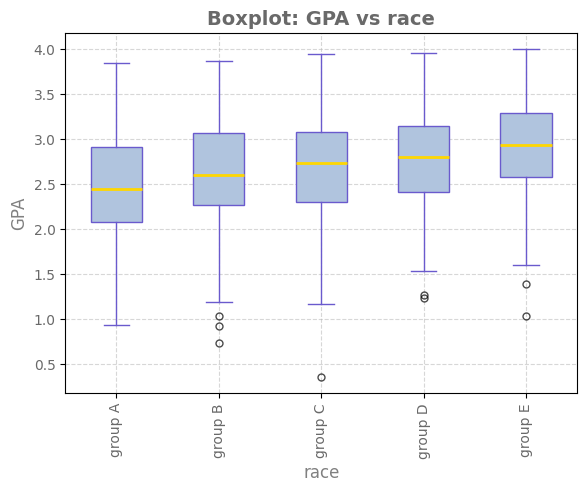

<Figure size 800x600 with 0 Axes>

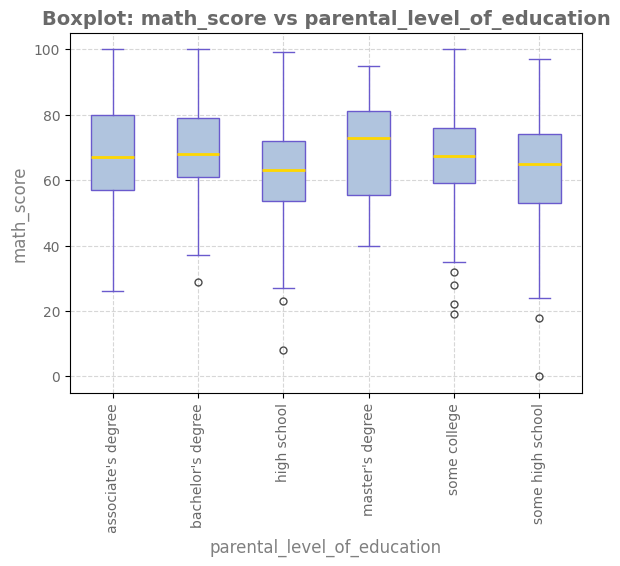

<Figure size 800x600 with 0 Axes>

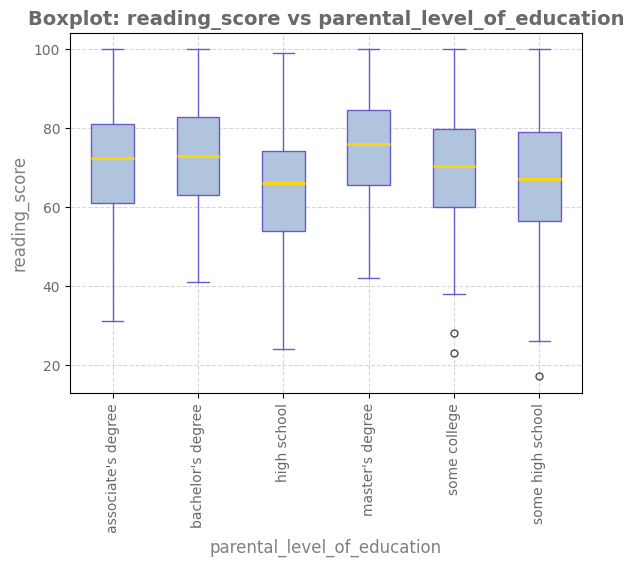

<Figure size 800x600 with 0 Axes>

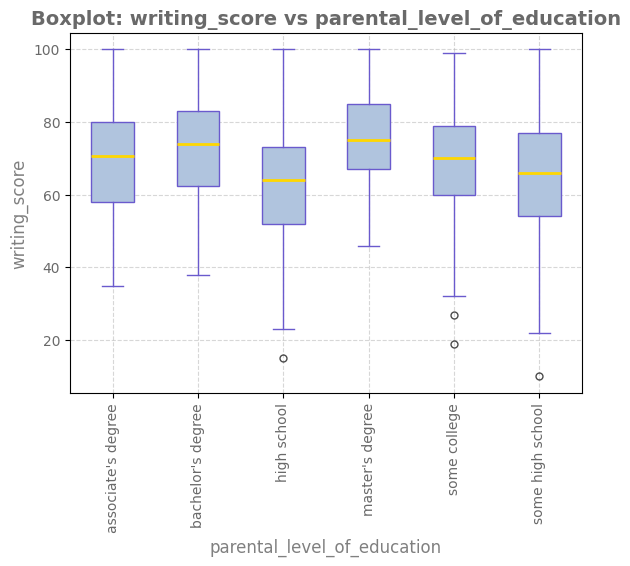

<Figure size 800x600 with 0 Axes>

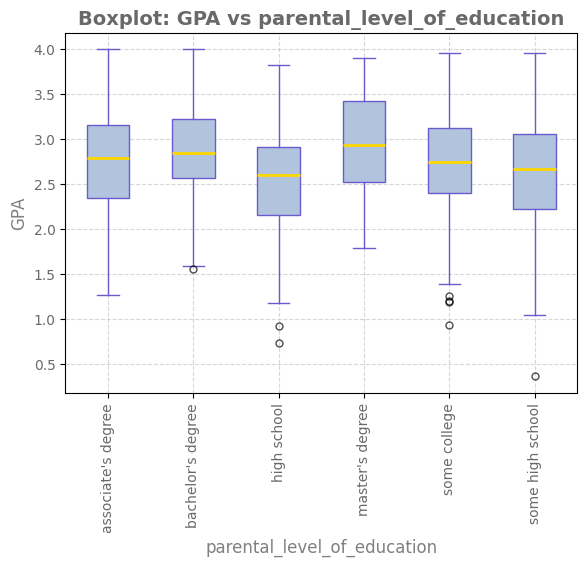

<Figure size 800x600 with 0 Axes>

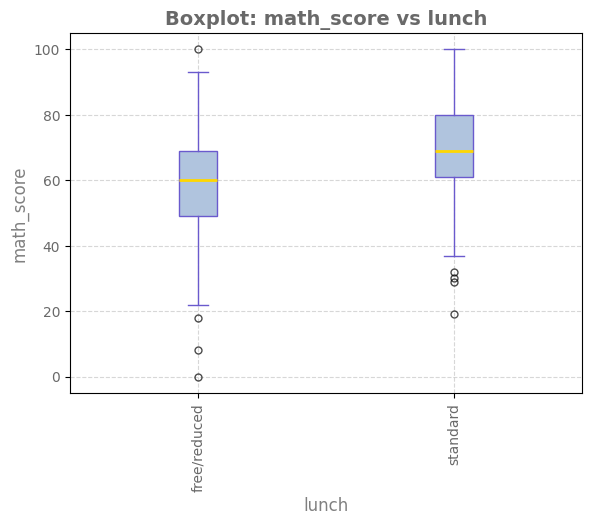

<Figure size 800x600 with 0 Axes>

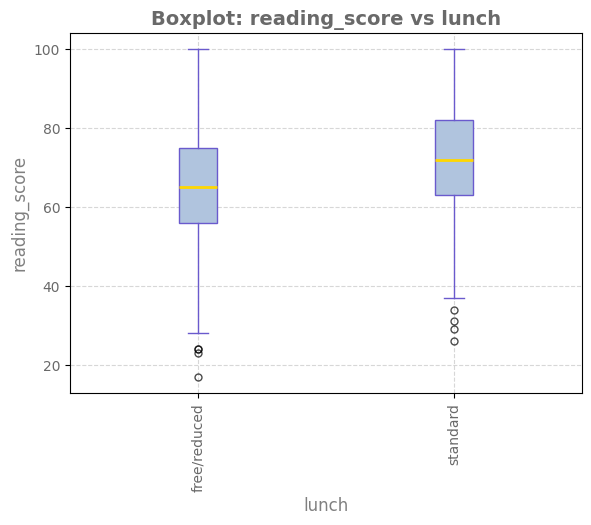

<Figure size 800x600 with 0 Axes>

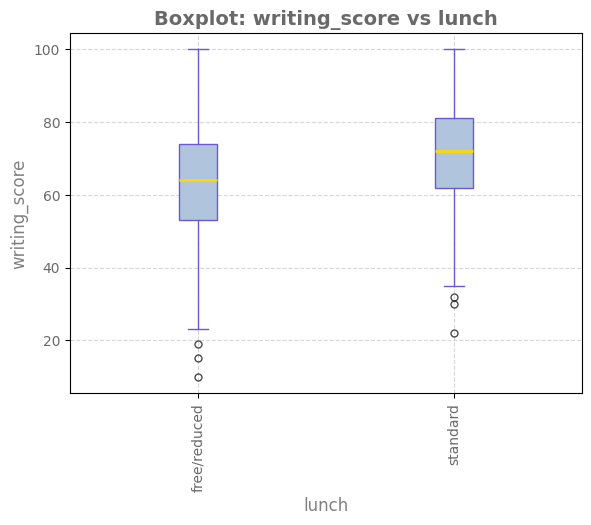

<Figure size 800x600 with 0 Axes>

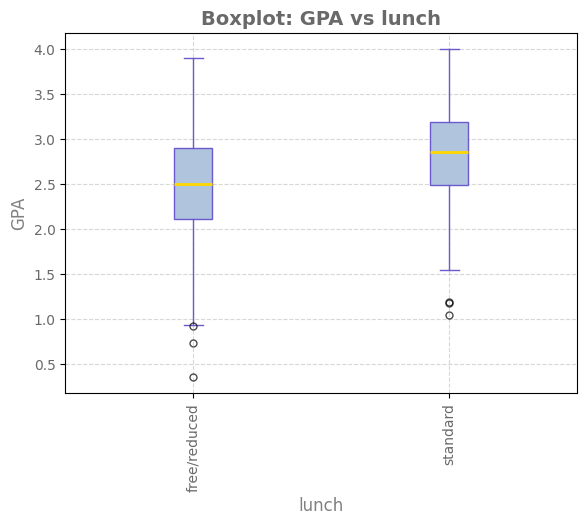

<Figure size 800x600 with 0 Axes>

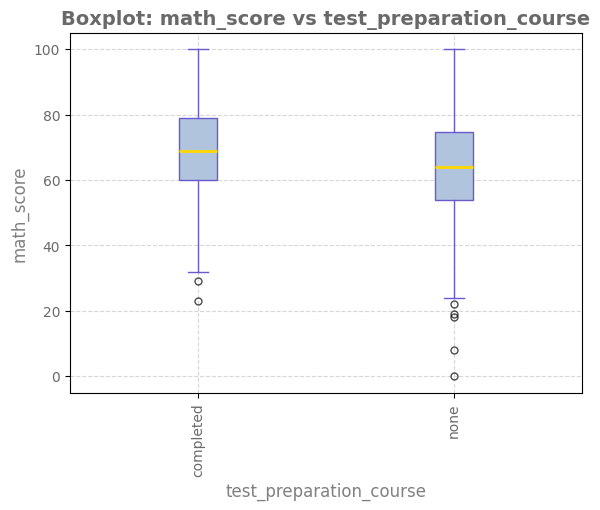

<Figure size 800x600 with 0 Axes>

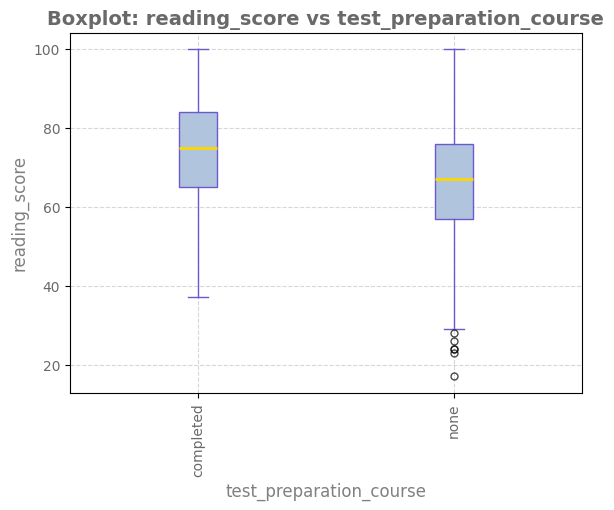

<Figure size 800x600 with 0 Axes>

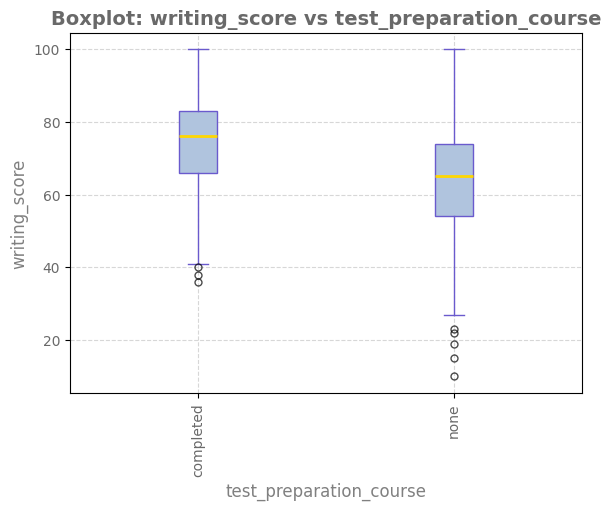

<Figure size 800x600 with 0 Axes>

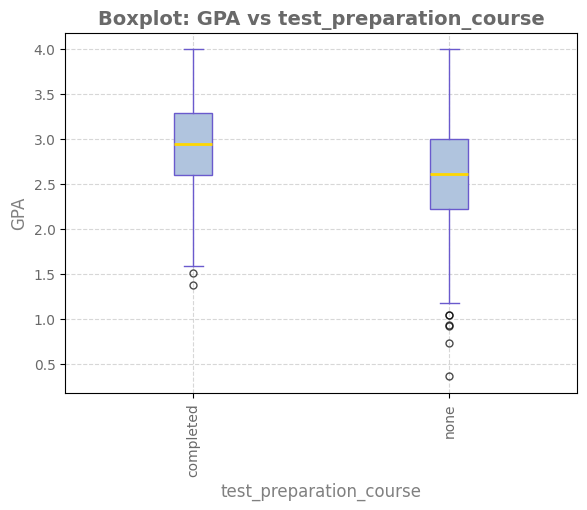

In [159]:
for cat_col in cat_cols:
    for num_col in num_cols:
        # Crear figura
        plt.figure(figsize=(8, 6))
        
        df.boxplot(column=num_col, by=cat_col, grid=True, patch_artist=True,
                boxprops=dict(facecolor='lightsteelblue', color='slateblue'),  # caja azul suave con borde más oscuro
                whiskerprops=dict(color='slateblue'),  # bigotes azul oscuro
                flierprops=dict(marker='o', color='salmon', markersize=5, alpha=0.7),  # valores atípicos en rojo suave
                capprops=dict(color='slateblue'),  # tapas azul oscuro
                medianprops=dict(color='gold', linewidth=2))  # mediana en dorado

        # Personalizar gráfico
        plt.title(f"Boxplot: {num_col} vs {cat_col}", fontsize=14, fontweight='bold', color='dimgray')
        plt.suptitle('')  
        plt.xlabel(cat_col, fontsize=12, color='gray')
        plt.ylabel(num_col, fontsize=12, color='gray')
        plt.xticks(rotation=90, fontsize=10, color='dimgray')
        plt.yticks(fontsize=10, color='dimgray')
        plt.grid(True, linestyle="--", alpha=0.5)  # cuadrícula sutil

        plt.show()


## 3. Simulación del Dataset Expandido

##### las columnas categóricas que se para utilizarán en el paso de simulación seran:
##### *test_preparation_course
##### *parental_level_of_education
##### *gender

#### Agrupando cateogiras para obtener su probabilidad 

##### Generando lista con las categorias seleccionadas

In [106]:
cat_cols_seleccionadas = ['test_preparation_course', 'parental_level_of_education', 'gender']

In [107]:
prob_freq = df.groupby( cat_cols_seleccionadas , as_index=False ).agg({
    "GPA": ["count"]
})

prob_freq.columns = cat_cols_seleccionadas + ["frecuencia"]

In [108]:
prob_freq

,test_preparation_course,parental_level_of_education,gender,frecuencia
0,completed,associate's degree,female,42
1,completed,associate's degree,male,40
2,completed,bachelor's degree,female,22
3,completed,bachelor's degree,male,24
4,completed,high school,female,29
5,completed,high school,male,27
6,completed,master's degree,female,14
7,completed,master's degree,male,6
8,completed,some college,female,42
9,completed,some college,male,35


##### Revisando si la suma da 1

In [109]:
np.sum( prob_freq["frecuencia"] / df.shape[0] )

np.float64(1.0)

##### Sacando en porcentaje 

In [110]:
prob_freq["porcentaje"] = prob_freq["frecuencia"] / df.shape[0] 

In [111]:
prob_freq

,test_preparation_course,parental_level_of_education,gender,frecuencia,porcentaje
0,completed,associate's degree,female,42,0.042
1,completed,associate's degree,male,40,0.040
2,completed,bachelor's degree,female,22,0.022
3,completed,bachelor's degree,male,24,0.024
4,completed,high school,female,29,0.029
5,completed,high school,male,27,0.027
6,completed,master's degree,female,14,0.014
7,completed,master's degree,male,6,0.006
8,completed,some college,female,42,0.042
9,completed,some college,male,35,0.035


In [112]:
cat_cols_seleccionadas = ['test_preparation_course', 'parental_level_of_education', 'gender']

##### las variables numericas se mantienen igual 

In [113]:
num_cols

['math_score', 'reading_score', 'writing_score', 'GPA']

#### Graficando valores atipicos, con las categorias seleccionadas 

<Figure size 6000x2000 with 0 Axes>

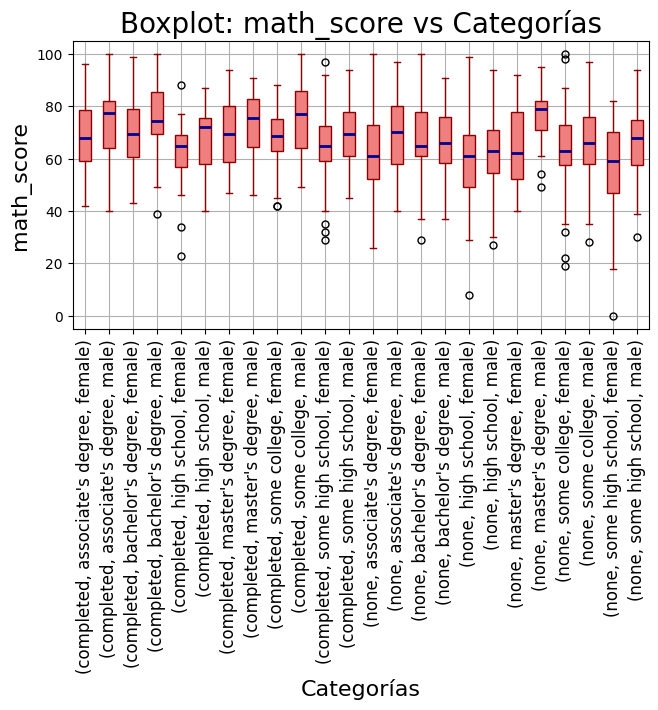

<Figure size 6000x2000 with 0 Axes>

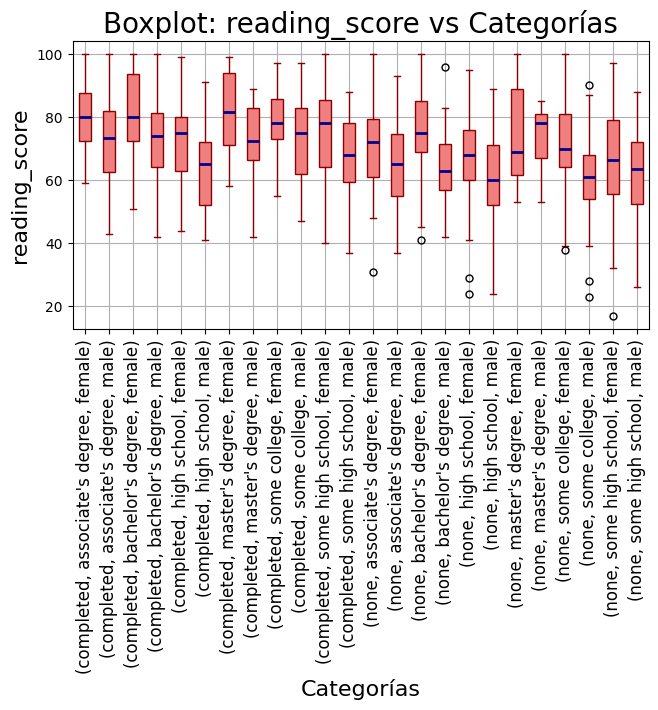

<Figure size 6000x2000 with 0 Axes>

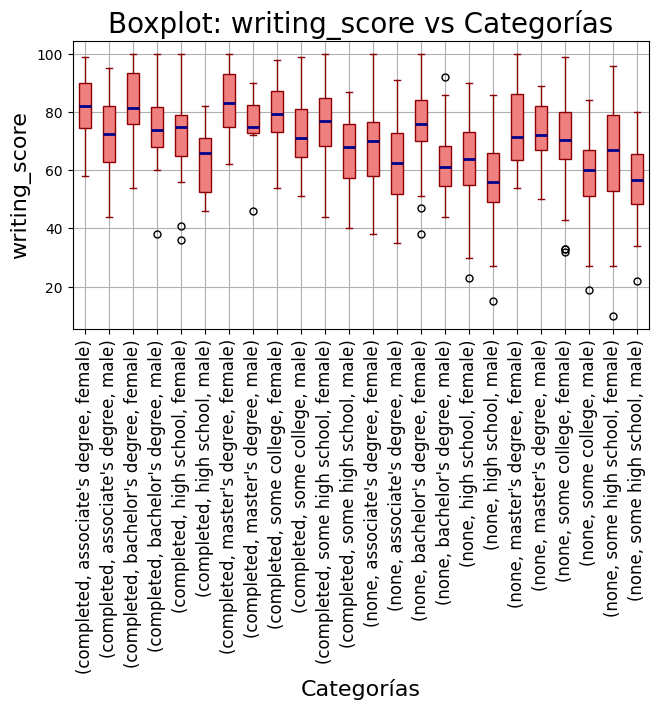

<Figure size 6000x2000 with 0 Axes>

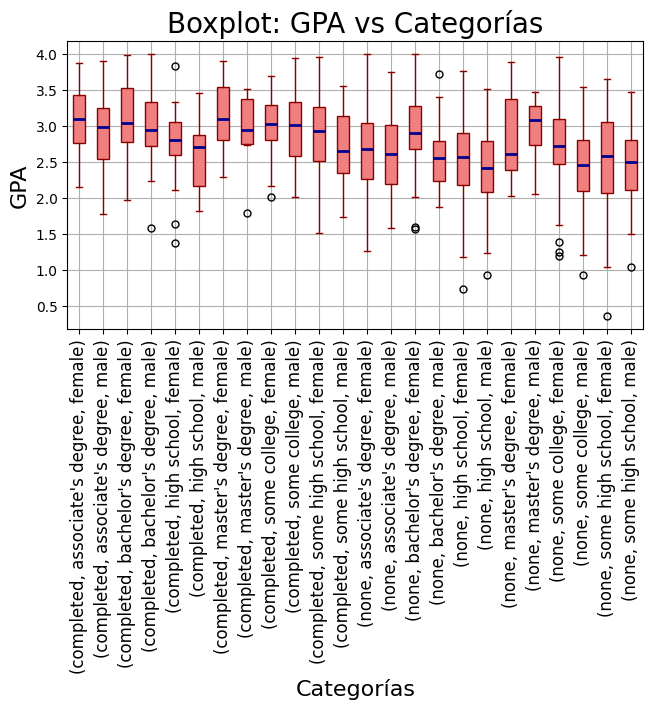

In [ ]:
for num_col in num_cols:
    plt.figure(figsize=(60, 20))  

    
    df.boxplot(column=num_col, by=cat_cols_seleccionadas, grid=True, patch_artist=True,
                boxprops=dict(facecolor='lightcoral', color='darkred'),  
                whiskerprops=dict(color='darkred'),
                flierprops=dict(marker='o', color='purple', markersize=5), 
                capprops=dict(color='darkred'),
                medianprops=dict(color='darkblue', linewidth=2))  
    
    # Personalizar gráfico
    plt.title(f"Boxplot: {num_col} vs Categorías", fontsize=20, color='black')
    plt.suptitle('')  # Eliminar título automático
    plt.xlabel('Categorías', fontsize=16, color='black')
    plt.ylabel(num_col, fontsize=16, color='black')
    
    # Ajustes en las etiquetas del eje X
    plt.xticks(rotation=90, fontsize=12, color='black')
    
    # Ajustar márgenes 
    plt.subplots_adjust(left=0.05, right=0.95, bottom=0.25, top=0.85)  

    plt.show()


#### Limpiando datos atipicos 

##### Generando los upper y lower bound 

In [115]:
transformations = {}
new_cols = []

for num_col in num_cols:
    transformations[num_col] = [ 
        ('lower_bound', lambda x: x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25))),
        ('upper_bound', lambda x: x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
    ]
    new_cols.append(f"{num_col}_lower_bound")
    new_cols.append(f"{num_col}_upper_bound")

##### Juntando las categorias seleccionadas mas los upper y lower band

In [116]:
df_resultados = df.groupby(cat_cols_seleccionadas, as_index=False).agg(transformations)

In [117]:
df_resultados.columns = cat_cols_seleccionadas + new_cols

In [118]:
df_resultados

,test_preparation_course,parental_level_of_education,gender,math_score_lower_bound,math_score_upper_bound,reading_score_lower_bound,reading_score_upper_bound,writing_score_lower_bound,writing_score_upper_bound,GPA_lower_bound,GPA_upper_bound
0,completed,associate's degree,female,29.750,107.750,49.000,111.000,51.250,113.250,1.768333,4.421667
1,completed,associate's degree,male,37.625,108.625,33.250,111.250,34.500,110.500,1.478333,4.318333
2,completed,bachelor's degree,female,32.750,106.750,41.000,125.000,49.750,119.750,1.643333,4.656667
3,completed,bachelor's degree,male,45.500,109.500,38.125,107.125,47.375,102.375,1.810000,4.236667
4,completed,high school,female,39.000,87.000,37.500,105.500,44.000,100.000,1.920000,3.733333
5,completed,high school,male,31.750,101.750,22.000,102.000,24.750,98.750,1.106667,3.933333
6,completed,master's degree,female,26.875,111.875,36.500,128.500,47.625,120.625,1.701667,4.648333
7,completed,master's degree,male,37.125,110.125,41.750,107.750,58.125,97.125,1.805000,4.325000
8,completed,some college,female,45.000,93.000,53.875,104.875,51.625,108.625,2.076667,4.023333
9,completed,some college,male,31.000,119.000,30.500,114.500,39.750,105.750,1.466667,4.453333


##### Uniendo los resultados de los upper y lower con el df original 

In [119]:
df_bound = df.merge(
    df_resultados,
    on=cat_cols_seleccionadas,
    how="inner"  
)

In [120]:
df_bound

,gender,race,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,GPA,math_score_lower_bound,math_score_upper_bound,reading_score_lower_bound,reading_score_upper_bound,writing_score_lower_bound,writing_score_upper_bound,GPA_lower_bound,GPA_upper_bound
0,female,group B,bachelor's degree,standard,none,72,72,74,2.906667,35.500,103.500,45.000,109.000,49.000,105.000,1.780000,4.180000
1,female,group C,some college,standard,completed,69,90,88,3.293333,45.000,93.000,53.875,104.875,51.625,108.625,2.076667,4.023333
2,female,group B,master's degree,standard,none,90,95,93,3.706667,14.000,116.000,20.250,130.250,29.375,120.375,0.901667,4.861667
3,male,group A,associate's degree,free/reduced,none,47,57,44,1.973333,25.000,113.000,25.375,104.375,20.875,103.875,0.968333,4.235000
4,male,group C,some college,standard,none,76,78,75,3.053333,31.000,103.000,33.000,89.000,27.000,91.000,1.033333,3.860000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,3.760000,26.875,111.875,36.500,128.500,47.625,120.625,1.701667,4.648333
996,male,group C,high school,free/reduced,none,62,55,55,2.293333,29.750,95.750,23.500,99.500,23.500,91.500,1.026667,3.853333
997,female,group C,high school,free/reduced,completed,59,71,65,2.600000,39.000,87.000,37.500,105.500,44.000,100.000,1.920000,3.733333
998,female,group D,some college,standard,completed,68,78,77,2.973333,45.000,93.000,53.875,104.875,51.625,108.625,2.076667,4.023333


##### Comenzando a excluir los valores atipicos

In [121]:
for num_col in num_cols:
    # Mostrar el número de filas antes del procesamiento
    print(f"Row: {df_bound.shape[0]} - {num_col}: processing...")
    
    # Guardar el número de filas antes de la limpieza
    rows_before = df_bound.shape[0]
    
    # Realizar la limpieza de los valores atípicos
    df_bound = df_bound.loc[
        (df_bound[num_col] > df_bound[f"{num_col}_lower_bound"]) 
        &
        (df_bound[num_col] < df_bound[f"{num_col}_upper_bound"]),
        :
    ]
    
    # Calcular la cantidad de valores eliminados
    rows_after = df_bound.shape[0]
    removed_rows = rows_before - rows_after
    
    # Imprimir cuántos valores atípicos fueron eliminados
    print(f"Se eliminaron {removed_rows} valores atípicos en la columna {num_col}.")
    print(f"Quedan {rows_after} registros en total.")


Row: 1000 - math_score: processing...
Se eliminaron 25 valores atípicos en la columna math_score.
Quedan 975 registros en total.
Row: 975 - reading_score: processing...
Se eliminaron 6 valores atípicos en la columna reading_score.
Quedan 969 registros en total.
Row: 969 - writing_score: processing...
Se eliminaron 2 valores atípicos en la columna writing_score.
Quedan 967 registros en total.
Row: 967 - GPA: processing...
Se eliminaron 0 valores atípicos en la columna GPA.
Quedan 967 registros en total.


##### Generando graficos para ver la limpieza de los valores atipicos 

<Figure size 6000x2000 with 0 Axes>

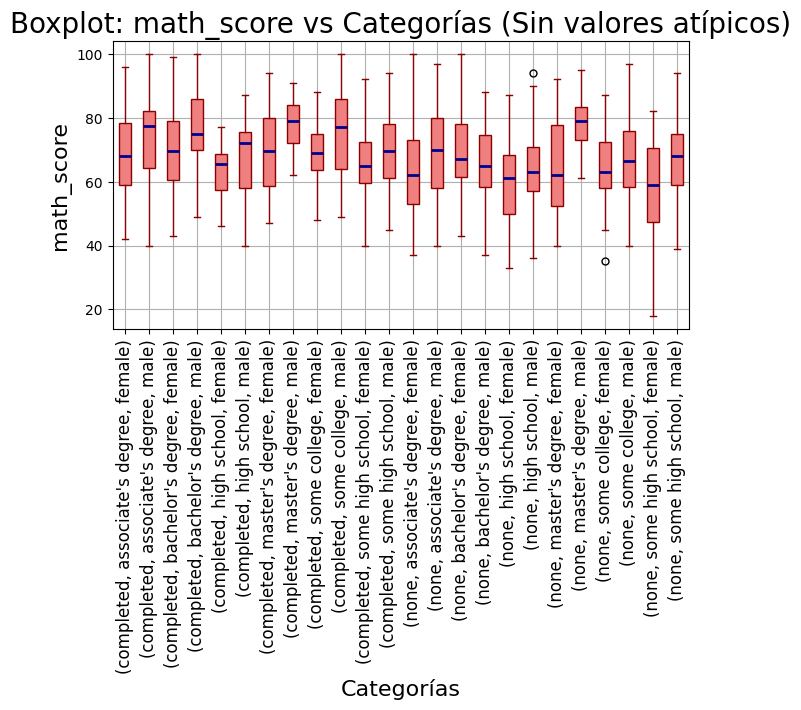

<Figure size 6000x2000 with 0 Axes>

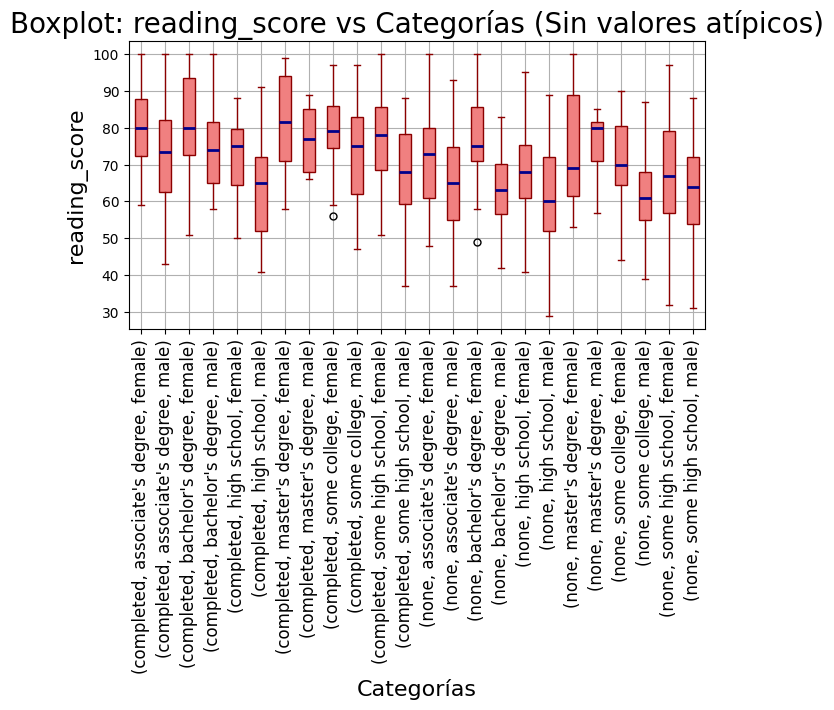

<Figure size 6000x2000 with 0 Axes>

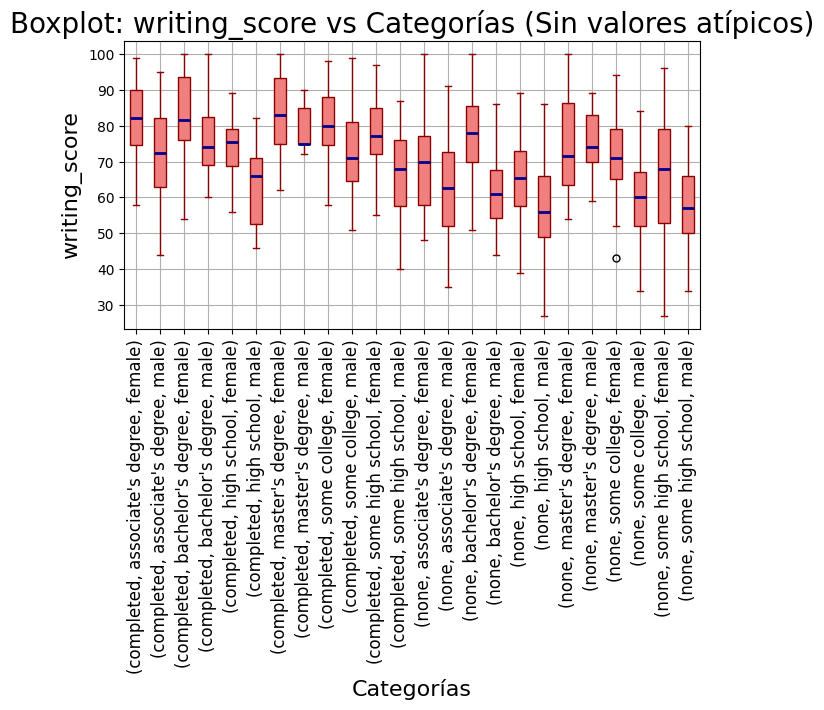

<Figure size 6000x2000 with 0 Axes>

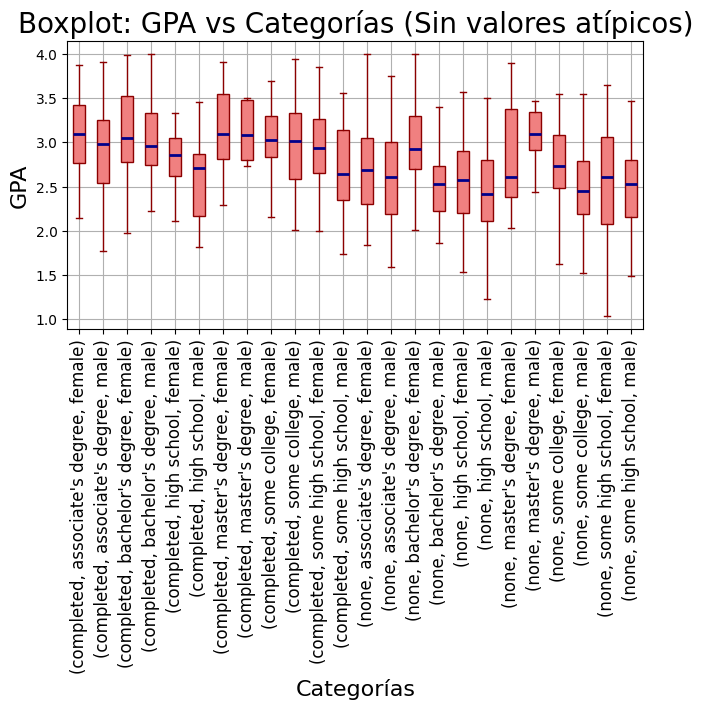

In [122]:
for num_col in num_cols:
    plt.figure(figsize=(60, 20))  

    # Crear el boxplot con los datos ya limpiados (sin valores atípicos)
    df_bound.boxplot(column=num_col, by=cat_cols_seleccionadas, grid=True, patch_artist=True,
                boxprops=dict(facecolor='lightcoral', color='darkred'),  
                whiskerprops=dict(color='darkred'),
                flierprops=dict(marker='o', color='purple', markersize=5), 
                capprops=dict(color='darkred'),
                medianprops=dict(color='darkblue', linewidth=2))  
    
    # Personalizar gráfico
    plt.title(f"Boxplot: {num_col} vs Categorías (Sin valores atípicos)", fontsize=20, color='black')
    plt.suptitle('')  # Eliminar título automático
    plt.xlabel('Categorías', fontsize=16, color='black')
    plt.ylabel(num_col, fontsize=16, color='black')
    
    # Ajustes en las etiquetas del eje X
    plt.xticks(rotation=90, fontsize=12, color='black')
    
    # Ajustar márgenes para evitar solapamiento
    plt.subplots_adjust(left=0.05, right=0.95, bottom=0.25, top=0.85)  

    plt.show()


#### Luego de la limpieza comenzamos a expandir

##### Generando un df con valores limpios

In [123]:
df_clean = df_bound.loc[:,cat_cols_seleccionadas +num_cols]

In [124]:
df_clean

,test_preparation_course,parental_level_of_education,gender,math_score,reading_score,writing_score,GPA
0,none,bachelor's degree,female,72,72,74,2.906667
1,completed,some college,female,69,90,88,3.293333
2,none,master's degree,female,90,95,93,3.706667
3,none,associate's degree,male,47,57,44,1.973333
4,none,some college,male,76,78,75,3.053333
...,...,...,...,...,...,...,...
995,completed,master's degree,female,88,99,95,3.760000
996,none,high school,male,62,55,55,2.293333
997,completed,high school,female,59,71,65,2.600000
998,completed,some college,female,68,78,77,2.973333


##### Creando un diccionario con estadísticas ("min", "max", "mean", "std") para cada columna numérica y una lista con sus nombres

In [125]:
summ_aggregations = {}
cols_summ = []
for num_col in num_cols:
    summ_aggregations[num_col] = [ "min" , "max" , "mean" , "std" ]
    cols_summ.append( f"{num_col}_min" )
    cols_summ.append( f"{num_col}_max" )
    cols_summ.append( f"{num_col}_mean" )
    cols_summ.append( f"{num_col}_std" )

In [126]:
summ_aggregations

{'math_score': ['min', 'max', 'mean', 'std'],
 'reading_score': ['min', 'max', 'mean', 'std'],
 'writing_score': ['min', 'max', 'mean', 'std'],
 'GPA': ['min', 'max', 'mean', 'std']}

##### Agrupando df_clean por las columnas categóricas seleccionadas y calculando sus ("min", "max", "mean", "std") 

In [127]:
df_summ = df_clean.groupby(
    cat_cols_seleccionadas
    , as_index=False
).agg(summ_aggregations)

In [128]:
df_summ.columns = cat_cols_seleccionadas +  cols_summ

In [129]:
df_summ.head(3)

,test_preparation_course,parental_level_of_education,gender,math_score_min,math_score_max,math_score_mean,math_score_std,reading_score_min,reading_score_max,reading_score_mean,reading_score_std,writing_score_min,writing_score_max,writing_score_mean,writing_score_std,GPA_min,GPA_max,GPA_mean,GPA_std
0,completed,associate's degree,female,42,96,70.047619,13.310462,59,100,79.714286,10.157985,58,99,81.738095,10.186216,2.146667,3.880000,3.086667,0.427167
1,completed,associate's degree,male,40,100,73.700000,15.305772,43,100,72.450000,13.841502,44,95,71.650000,13.094430,1.773333,3.906667,2.904000,0.547839
2,completed,bachelor's degree,female,43,99,71.000000,16.268579,51,100,80.681818,14.535298,54,100,83.000000,12.787643,1.973333,3.986667,3.129091,0.568140


#### Comenzando la expansion del DF


##### Cantidad de registros a expandir

In [164]:
num_ext = 100000

In [165]:
ids = np.random.choice( prob_freq.index , size=num_ext, p=prob_freq["porcentaje"].to_list() )

In [166]:
len(ids[ids == 0])

4152

In [167]:
len(ids[ids == 0])/len(ids)

0.04152

#####  Generando valores aleatorios siguiendo una distribución normal truncada, con media 'media' y desviación estándar 'desv_std', dentro del rango [min_val, max_val].


In [168]:
def trunc_vector(min_val, max_val, media, desv_std,size):
    a, b = (min_val - media) / desv_std, (max_val - media) / desv_std
    
    muestras = truncnorm.rvs(a, b, loc=media, scale=desv_std, size=size)
    return muestras

##### extendiendo el dataframe, generando valores aleatorios para cada columna numérica.  Para cada categoría en con sus posibles combinaciones, Se generan valores aleatorios con distribución normal truncada usando estadísticas de df_summ(con estadísticas (min, max, mean, std))

In [169]:
dfextended = pd.DataFrame()
for i in prob_freq.index:
    setting = {
        "id": ids[ ids == i ]
    }
    for c in num_cols:
        setting[c] = trunc_vector( 
            df_summ.iloc[i][f"{c}_min"]
            , df_summ.iloc[i][f"{c}_max"]
            , df_summ.iloc[i][f"{c}_mean"]
            , df_summ.iloc[i][f"{c}_std"]
            , len( ids[ ids == i ] )
        )
    tmp = pd.DataFrame(setting)
    dfextended = pd.concat( [ dfextended , tmp ] )
    

In [170]:
dfextended

,id,math_score,reading_score,writing_score,GPA
0,0,68.845547,75.329896,79.869905,2.806955
1,0,68.818172,82.925402,73.236117,3.138919
2,0,84.020493,72.413636,74.255216,3.049348
3,0,58.356600,84.999698,70.356476,3.358176
4,0,60.205680,63.498591,77.711695,2.719824
...,...,...,...,...,...
4613,23,74.690851,69.817326,70.968755,2.261645
4614,23,56.197721,73.807583,43.352136,2.657139
4615,23,60.372191,75.896298,59.653070,2.494777
4616,23,64.301620,85.385804,62.359058,2.660652


In [171]:
dfextended.shape[0]

100000

##### Uniendo las categorias seleccionadas con el dfextendido numerico

In [172]:
prob_freq["id"] = prob_freq.index

In [173]:
dfextended = prob_freq.loc[:,["id"]+cat_cols_seleccionadas].merge(
    dfextended,
    on=["id"],
    how="inner"
)

## 4. Análisis Comparativo (EDA del Dataset Expandido)


In [140]:
dfextended = dfextended.drop(columns=["id"])

In [141]:
dfextended

,test_preparation_course,parental_level_of_education,gender,math_score,reading_score,writing_score,GPA
0,completed,associate's degree,female,79.685187,79.817793,77.850400,3.225703
1,completed,associate's degree,female,69.406036,60.602648,78.747633,3.695295
2,completed,associate's degree,female,71.889258,86.016436,96.488782,3.356387
3,completed,associate's degree,female,83.130441,65.510118,81.835160,2.932033
4,completed,associate's degree,female,88.176367,80.604954,90.224072,3.024571
...,...,...,...,...,...,...,...
99995,none,some high school,male,72.675158,61.168281,42.524175,1.956141
99996,none,some high school,male,63.512876,42.653200,64.137186,2.311318
99997,none,some high school,male,53.433608,50.184390,45.044008,2.079182
99998,none,some high school,male,52.335362,69.245456,42.102747,2.274447


In [142]:
dfextended.describe()

,math_score,reading_score,writing_score,GPA
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,66.564115,69.544404,68.599650,2.734037
std,12.545458,12.423537,13.073610,0.476830
min,18.013980,29.021237,27.001369,1.042525
25%,57.889987,60.976293,59.449006,2.403580
50%,66.615417,69.933158,69.058495,2.745240
75%,75.371922,78.475824,78.137800,3.076053
max,99.999909,99.994075,99.989247,3.998361


#### Histograma de las variables numericas 

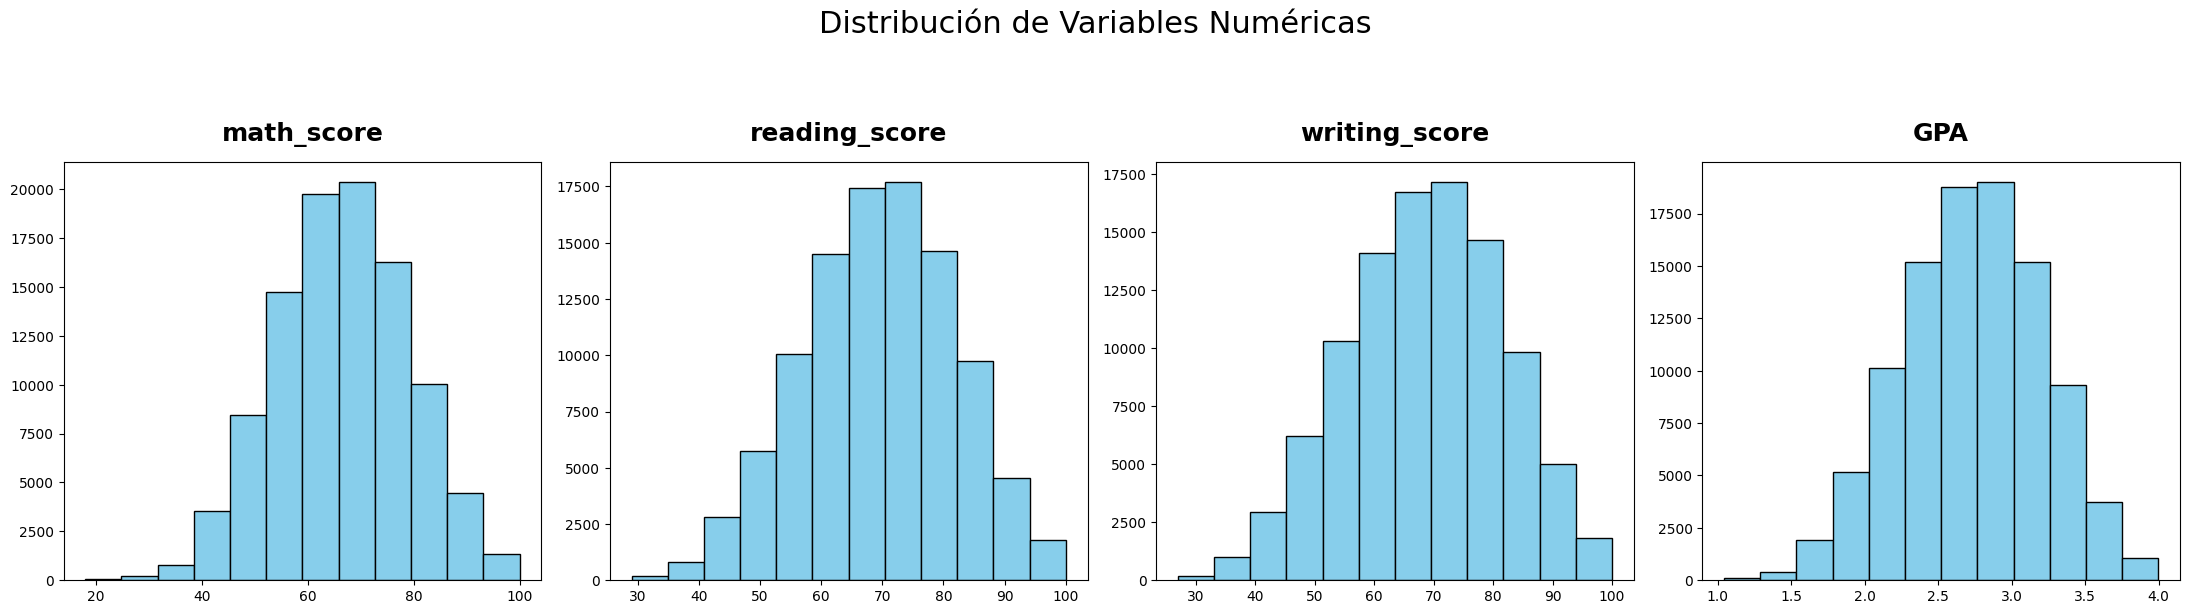

In [143]:
axes = dfextended[num_cols].hist(
    figsize=(22, 19), bins=12, edgecolor='black', layout=(4, 4), grid=False, color='skyblue'
)

for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=18,y = 1.03, fontweight='bold') 
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)  
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)  

plt.suptitle('Distribución de Variables Numéricas', fontsize=22, y=1.03)

plt.tight_layout()
plt.show()


In [144]:
dfextended[num_cols].corr()

,math_score,reading_score,writing_score,GPA
math_score,1.000000,0.073255,0.092100,0.108386
reading_score,0.073255,1.000000,0.282998,0.208551
writing_score,0.092100,0.282998,1.000000,0.256770
GPA,0.108386,0.208551,0.256770,1.000000


In [145]:
distribuciones_extended = dfextended.groupby( cat_cols_seleccionadas , as_index=False ).agg({
    "GPA": ["count"]
})

distribuciones_extended.columns = cat_cols_seleccionadas + ["count"]

In [146]:
distribuciones_extended

,test_preparation_course,parental_level_of_education,gender,count
0,completed,associate's degree,female,4250
1,completed,associate's degree,male,3985
2,completed,bachelor's degree,female,2146
3,completed,bachelor's degree,male,2394
4,completed,high school,female,2866
5,completed,high school,male,2781
6,completed,master's degree,female,1381
7,completed,master's degree,male,620
8,completed,some college,female,4280
9,completed,some college,male,3410


In [147]:
np.sum( distribuciones_extended["count"] / dfextended.shape[0] )

np.float64(0.9999999999999999)

<Figure size 800x600 with 0 Axes>

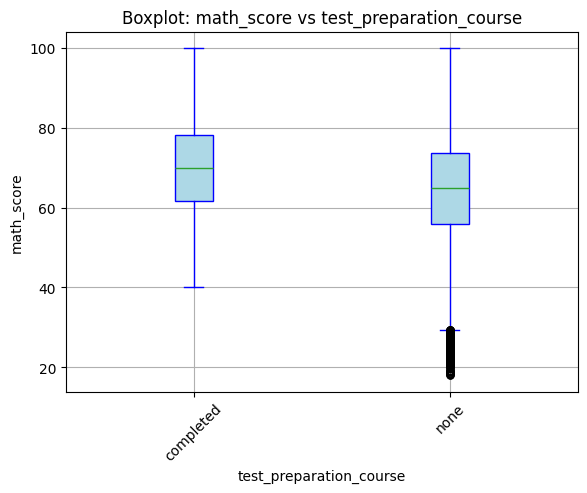

<Figure size 800x600 with 0 Axes>

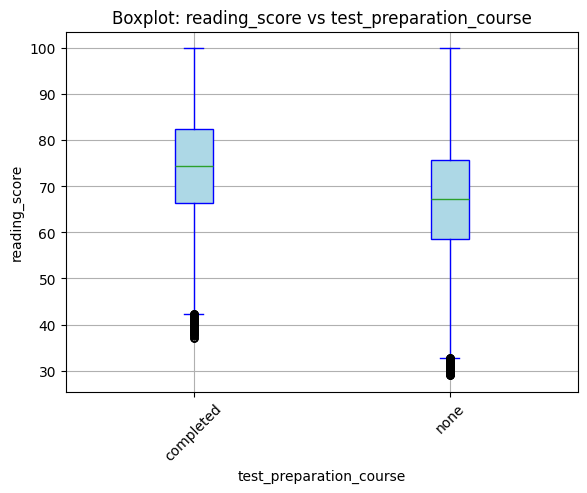

<Figure size 800x600 with 0 Axes>

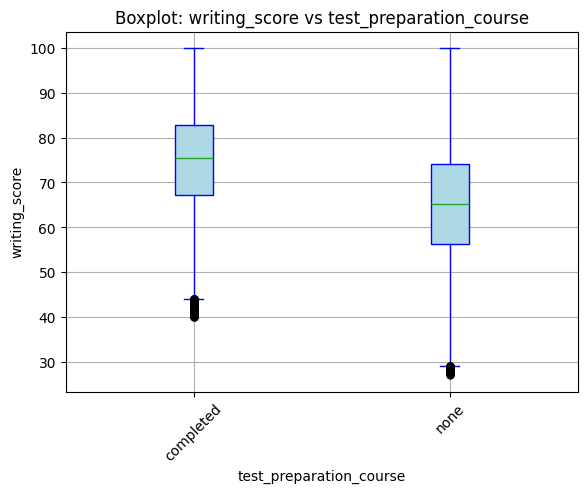

<Figure size 800x600 with 0 Axes>

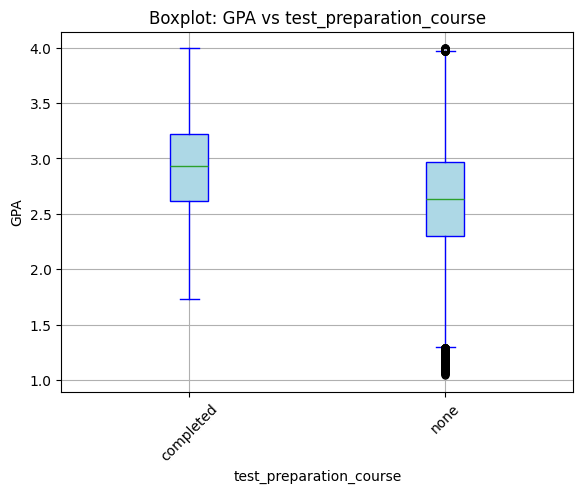

<Figure size 800x600 with 0 Axes>

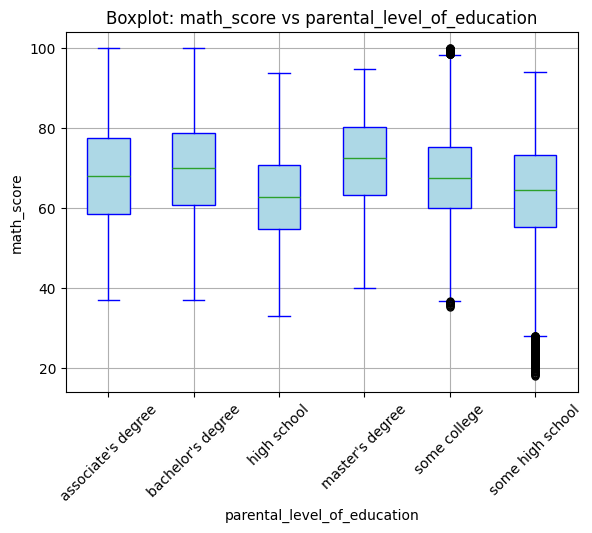

<Figure size 800x600 with 0 Axes>

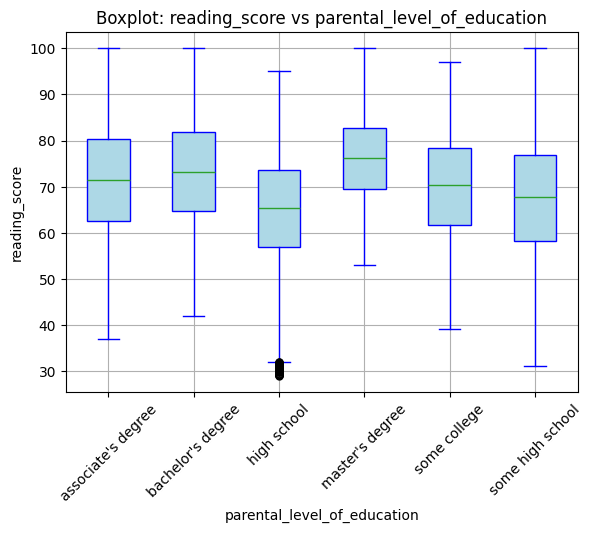

<Figure size 800x600 with 0 Axes>

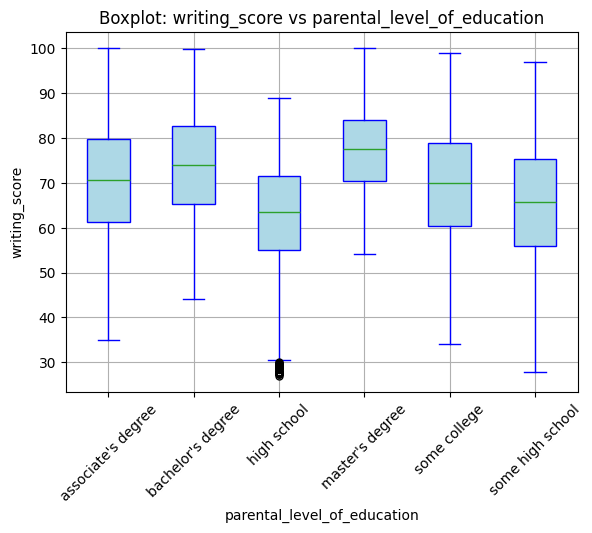

<Figure size 800x600 with 0 Axes>

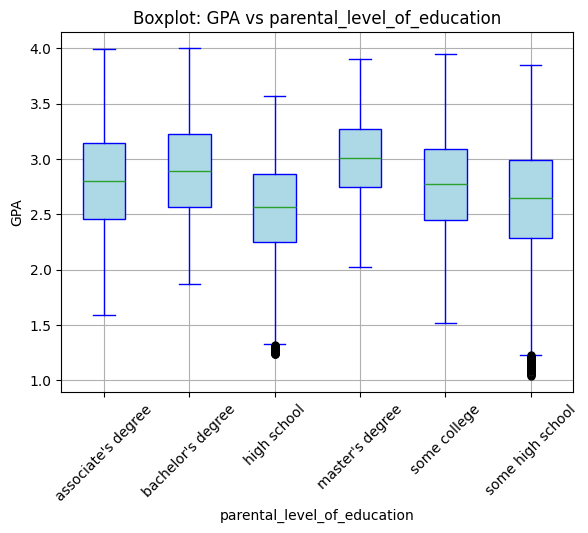

<Figure size 800x600 with 0 Axes>

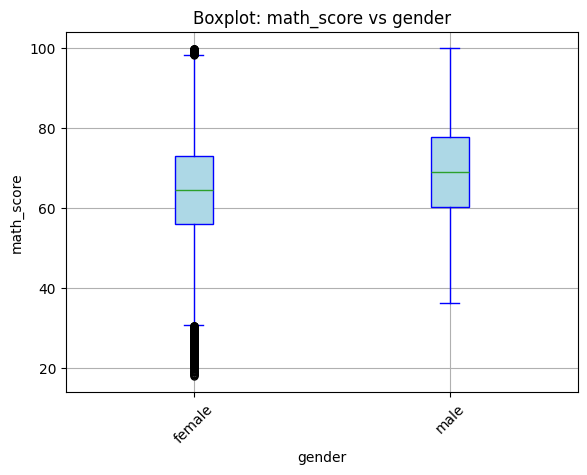

<Figure size 800x600 with 0 Axes>

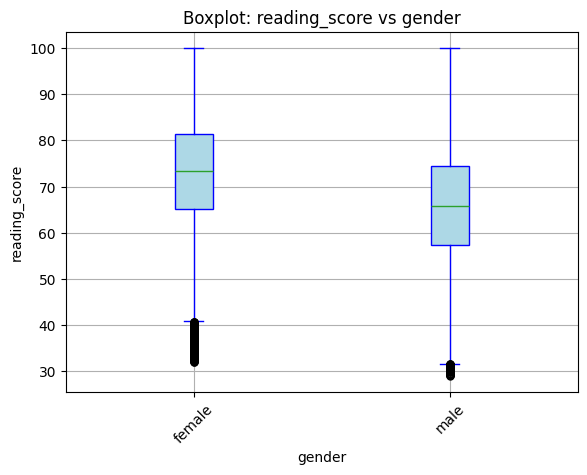

<Figure size 800x600 with 0 Axes>

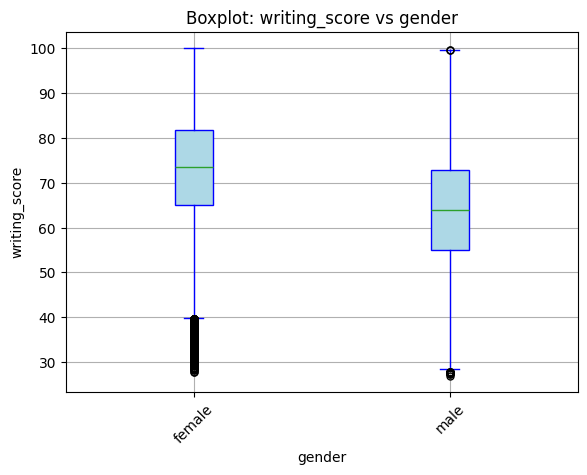

<Figure size 800x600 with 0 Axes>

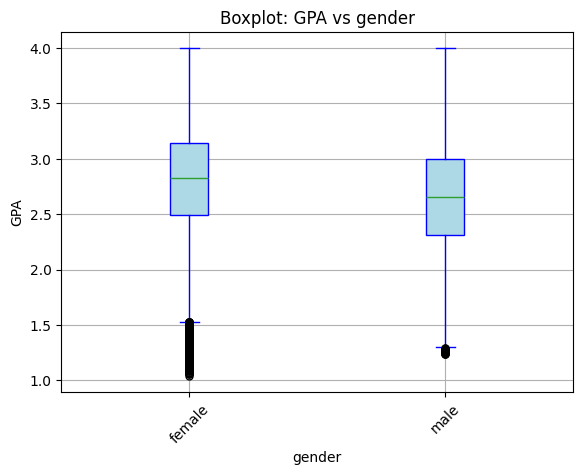

In [148]:
for cat_col in cat_cols_seleccionadas:
    for num_col in num_cols:
        # Crear figura
        plt.figure(figsize=(8, 6))
        
        dfextended.boxplot(column=num_col, by=cat_col, grid=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='blue'),
                    whiskerprops=dict(color='blue'),
                    flierprops=dict(marker='o', color='red', markersize=5),
                    capprops=dict(color='blue'))

        # Personalizar gráfico
        plt.title(f"Boxplot: {num_col} vs {cat_col}")
        plt.suptitle('')  
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)  # Rota etiquetas para una mejor visualización
        plt.grid(True)

        plt.show()


#### Comparando los dos datasets

In [149]:
df_original_filtered = df[['test_preparation_course', 'parental_level_of_education', 'gender'] + num_cols] 


In [150]:
df_original_filtered

,test_preparation_course,parental_level_of_education,gender,math_score,reading_score,writing_score,GPA
0,none,bachelor's degree,female,72,72,74,2.906667
1,completed,some college,female,69,90,88,3.293333
2,none,master's degree,female,90,95,93,3.706667
3,none,associate's degree,male,47,57,44,1.973333
4,none,some college,male,76,78,75,3.053333
...,...,...,...,...,...,...,...
995,completed,master's degree,female,88,99,95,3.760000
996,none,high school,male,62,55,55,2.293333
997,completed,high school,female,59,71,65,2.600000
998,completed,some college,female,68,78,77,2.973333


##### Viendo un resumen 

In [151]:
summary_original = df_original_filtered.describe(include='all')
summary_expanded = dfextended.describe(include='all')

# Mostrar resumen estadístico
print("Resumen Estadístico - Dataset Original:")
print(summary_original)
print("\nResumen Estadístico - Dataset Expandido:")
print(summary_expanded)

Resumen Estadístico - Dataset Original:
       test_preparation_course parental_level_of_education  gender  \
count                     1000                        1000    1000   
unique                       2                           6       2   
top                       none                some college  female   
freq                       642                         226     518   
mean                       NaN                         NaN     NaN   
std                        NaN                         NaN     NaN   
min                        NaN                         NaN     NaN   
25%                        NaN                         NaN     NaN   
50%                        NaN                         NaN     NaN   
75%                        NaN                         NaN     NaN   
max                        NaN                         NaN     NaN   

        math_score  reading_score  writing_score          GPA  
count   1000.00000    1000.000000    1000.000000  1000.

##### Influencia de la Simulación en la Calidad y Confiabilidad del Dataset

In [152]:
for col in cat_cols_seleccionadas:
    print(f"\nValores únicos en '{col}' - Original: {df_original_filtered[col].unique()}")
    print(f"Valores únicos en '{col}' - Expandido: {dfextended[col].unique()}")


Valores únicos en 'test_preparation_course' - Original: ['none' 'completed']
Valores únicos en 'test_preparation_course' - Expandido: ['completed' 'none']

Valores únicos en 'parental_level_of_education' - Original: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Valores únicos en 'parental_level_of_education' - Expandido: ["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']

Valores únicos en 'gender' - Original: ['female' 'male']
Valores únicos en 'gender' - Expandido: ['female' 'male']


##### valores minimos, maximos, std, y mean de las posibles combinaciones categoricas de df original

In [158]:
df_summ

,test_preparation_course,parental_level_of_education,gender,math_score_min,math_score_max,math_score_mean,math_score_std,reading_score_min,reading_score_max,reading_score_mean,reading_score_std,writing_score_min,writing_score_max,writing_score_mean,writing_score_std,GPA_min,GPA_max,GPA_mean,GPA_std
0,completed,associate's degree,female,42,96,70.047619,13.310462,59,100,79.714286,10.157985,58,99,81.738095,10.186216,2.146667,3.880000,3.086667,0.427167
1,completed,associate's degree,male,40,100,73.700000,15.305772,43,100,72.450000,13.841502,44,95,71.650000,13.094430,1.773333,3.906667,2.904000,0.547839
2,completed,bachelor's degree,female,43,99,71.000000,16.268579,51,100,80.681818,14.535298,54,100,83.000000,12.787643,1.973333,3.986667,3.129091,0.568140
3,completed,bachelor's degree,male,49,100,76.956522,12.267764,58,100,74.478261,11.369295,60,100,76.347826,10.258516,2.226667,4.000000,3.037101,0.428593
4,completed,high school,female,46,77,63.461538,8.705083,50,88,72.115385,10.242371,56,89,73.923077,8.508457,2.106667,3.333333,2.793333,0.347900
5,completed,high school,male,40,87,68.333333,12.063932,41,91,64.185185,13.234678,46,82,63.407407,11.606561,1.813333,3.453333,2.612346,0.479842
6,completed,master's degree,female,47,94,69.857143,14.421443,58,99,81.285714,13.510273,62,100,82.785714,12.447913,2.293333,3.906667,3.119048,0.525180
7,completed,master's degree,male,62,91,77.600000,11.148991,66,89,77.000000,10.124228,72,90,79.400000,7.700649,2.733333,3.506667,3.120000,0.364905
8,completed,some college,female,48,88,69.846154,10.561944,56,97,79.307692,9.687631,58,98,80.666667,9.392980,2.160000,3.693333,3.064274,0.377060
9,completed,some college,male,49,100,75.685714,14.634310,47,97,73.257143,13.571906,51,99,72.942857,12.235298,2.013333,3.946667,2.958476,0.519626


##### Extendido

In [154]:
df_summ_extended = dfextended.groupby(
    cat_cols_seleccionadas
    , as_index=False
).agg(summ_aggregations)

In [155]:
df_summ_extended.columns = cat_cols_seleccionadas +  cols_summ

##### valores minimos, maximos, std, y mean de las posibles combinaciones categoricas de df extendido

In [156]:
df_summ_extended.head(5)

,test_preparation_course,parental_level_of_education,gender,math_score_min,math_score_max,math_score_mean,math_score_std,reading_score_min,reading_score_max,reading_score_mean,reading_score_std,writing_score_min,writing_score_max,writing_score_mean,writing_score_std,GPA_min,GPA_max,GPA_mean,GPA_std
0,completed,associate's degree,female,42.097961,95.999660,69.918020,11.490907,59.050351,99.924507,79.579243,9.046255,58.316124,98.990488,80.954294,8.826973,2.148259,3.876575,3.075860,0.376077
1,completed,associate's degree,male,40.082796,99.999909,72.561732,13.070316,43.009192,99.944599,72.219607,12.039035,44.080623,94.979585,71.345118,11.299335,1.775203,3.905648,2.873827,0.479488
2,completed,bachelor's degree,female,43.054676,98.961461,70.622710,13.053121,51.044629,99.977117,78.864129,11.430983,54.106622,99.952459,81.262515,10.327254,1.976483,3.985892,3.076192,0.462338
3,completed,bachelor's degree,male,49.199620,99.984293,76.328295,10.866808,58.021646,99.932450,75.805537,9.289854,60.017896,99.661043,77.310051,8.819350,2.227197,3.996484,3.049477,0.378108
4,completed,high school,female,46.092465,76.983657,62.767284,7.225959,50.179248,87.942417,71.031802,8.595830,56.078625,88.944386,73.440036,7.427185,2.107083,3.333306,2.778223,0.287117


## Conclusión

##### Se puede observar que tanto el dataset original como el extendido mantienen distribuciones similares, con probabilidades y relaciones numéricas coherentes entre ellos. Esto indica que se respetaron los valores mínimos, máximos, desviaciones estándar y promedios, lo que sugiere que la expansión del dataset se realizó de manera adecuada. Como resultado, podemos confiar en que la simulación no alteró las características estadísticas fundamentales del conjunto de datos. Esto implica que el dataset extendido es válido para realizar análisis adicionales, ya que refleja de manera fiel las distribuciones del dataset original, pero con una muestra más grande.